In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.utils import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


import keras
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from tensorflow.keras.applications import VGG19


In [3]:
data_dir = '/Users/marta/Documents/data_dir/'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size = 32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size = 32)

Found 14633 files belonging to 2 classes.
Using 11707 files for training.
Found 14633 files belonging to 2 classes.
Using 2926 files for validation.


In [4]:
# Helped by Argishti Ovsepyan 
classes = np.array(['PLP', 'POR'])
y = [classes[0]] * 5422 + [classes[1]] * 9211
class_weights = compute_class_weight('balanced', classes=classes, y=y)

class_weights_dict = class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights_dict

{0: 1.349409811877536, 1: 0.794322006296819}

In [6]:
from tensorflow.keras.layers import Dropout

# Add dropout layers
cnn4 = Sequential()

cnn4.add(Conv2D(512, 3, activation='relu', input_shape=(256, 256, 3)))
cnn4.add(MaxPooling2D(2, padding='same'))
cnn4.add(Dropout(0.5))

cnn4.add(Conv2D(256, 3, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
cnn4.add(MaxPooling2D(2, padding='same'))
cnn4.add(Dropout(0.5))

cnn4.add(Conv2D(256, 3, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
cnn4.add(MaxPooling2D(2, padding='same'))
cnn4.add(Dropout(0.5))

cnn4.add(Conv2D(256, 3, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
cnn4.add(MaxPooling2D(2, padding='same'))
cnn4.add(Dropout(0.5))

cnn4.add(Flatten())
cnn4.add(Dense(1, activation='sigmoid'))

cnn4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history4 = cnn4.fit(train_ds, epochs=10, validation_data=val_ds, class_weight=class_weights_dict)


Epoch 1/10


2024-06-11 21:21:02.430662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [11707]
	 [[{{node Placeholder/_0}}]]
2024-06-11 21:21:02.430820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype double and shape [2]
	 [[{{node Placeholder/_17}}]]
2024-06-11 21:21:02.438845: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


366/366 [==============================] - ETA: 0s - loss: 18.3909 - acc: 0.5266

2024-06-11 22:18:26.550108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2926]
	 [[{{node Placeholder/_0}}]]
2024-06-11 22:18:26.550235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2926]
	 [[{{node Placeholder/_0}}]]


366/366 [==============================] - 3655s 10s/step - loss: 18.3909 - acc: 0.5266 - val_loss: 9.5408 - val_acc: 0.6237
Epoch 2/10
366/366 [==============================] - 3652s 10s/step - loss: 6.4428 - acc: 0.5563 - val_loss: 4.2146 - val_acc: 0.6237
Epoch 3/10
366/366 [==============================] - 3738s 10s/step - loss: 3.0466 - acc: 0.5832 - val_loss: 2.1743 - val_acc: 0.6237
Epoch 4/10
366/366 [==============================] - 3771s 10s/step - loss: 1.7066 - acc: 0.5466 - val_loss: 1.3493 - val_acc: 0.4751
Epoch 5/10
366/366 [==============================] - 3786s 10s/step - loss: 1.1444 - acc: 0.5688 - val_loss: 0.9667 - val_acc: 0.5390
Epoch 6/10
366/366 [==============================] - 3752s 10s/step - loss: 0.8734 - acc: 0.5882 - val_loss: 0.7726 - val_acc: 0.6141
Epoch 7/10
366/366 [==============================] - 3778s 10s/step - loss: 0.7428 - acc: 0.5910 - val_loss: 0.7077 - val_acc: 0.5964
Epoch 8/10
366/366 [==============================] - 3849s 11s/s

In [7]:
import pandas as pd
cnn4.save('./saved_models/cnn4.h5')
pd.DataFrame(history4.history).to_csv('./saved_models//history4.csv', index=False)

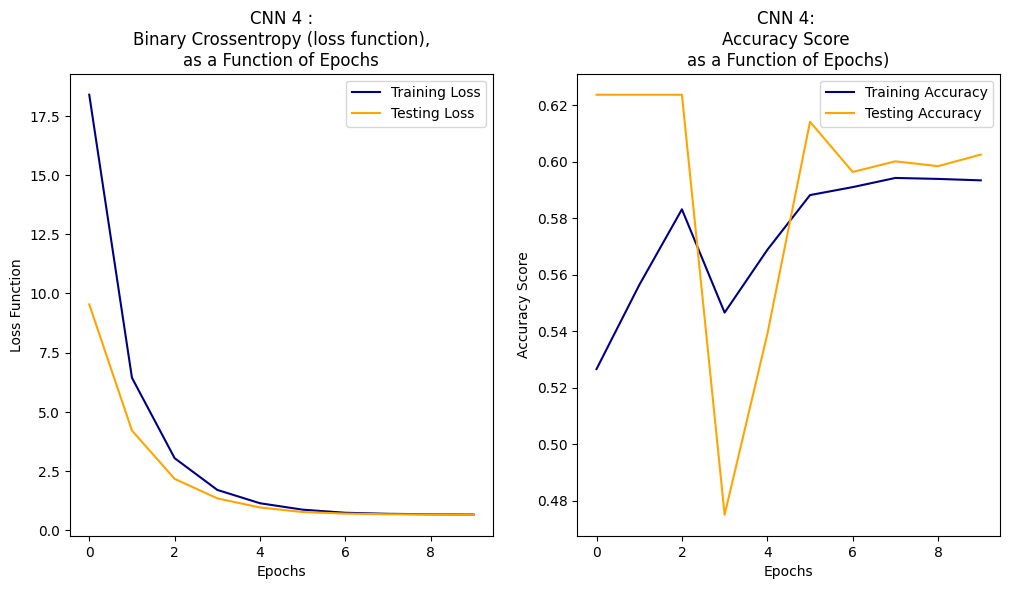

In [8]:
# Check out the plot of loss vs epoch.
plt.figure(figsize = (12, 6));

plt.subplot(1,2,1)
plt.plot(history4.history['loss'], c = 'navy', label = 'Training Loss');
plt.plot(history4.history['val_loss'], c = 'orange', label = 'Testing Loss');

plt.title('''CNN 4 :
Binary Crossentropy (loss function),
as a Function of Epochs''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history4.history['acc'], c = 'navy', label = 'Training Accuracy');
plt.plot(history4.history['val_acc'], c = 'orange', label = 'Testing Accuracy');
plt.title('''CNN 4: 
Accuracy Score 
as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();